# Inference

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage as spi
import matplotlib.pyplot as plt
from src.inference.classify3 import classify
import os
import sys
import urllib.request as urllib2
import tensorflow as tf

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (14,6)

/home/martin/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Clasify Image on the File System

/home/martin/anaconda3/envs/MaskRCNN/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


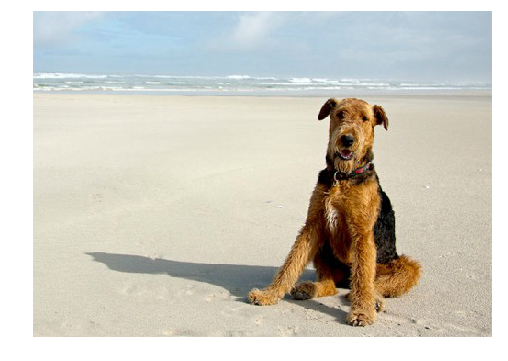

In [12]:
image_path = 'images/airedale.jpg'

img = plt.imshow(spi.imread(image_path))
img.set_cmap('hot')
_ = plt.axis('off')

In [27]:
probs = classify('file', 'images/louie45.jpg')
#probs.index = probs.breed
#_ = probs.take(range(5)).sort_values(['prob']).plot.barh(figsize=(8, 3))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

### Classify Image By Uri 

In [29]:
image_uri = 'https://static1.squarespace.com/static/531cdab7e4b0467fe7e67d18/5324c1f5e4b00257d6423524/5b15c59e575d1f3054c7c576/1528153514969/louie45.jpg'

response = urllib2.urlopen(image_uri)
img_raw = response.read(response)

with tf.Graph().as_default(), tf.Session().as_default() as sess:
    img = tf.image.decode_image(contents=img_raw).eval()

img = plt.imshow(img)
img.set_cmap('hot')
_ = plt.axis('off')

TypeError: an integer is required

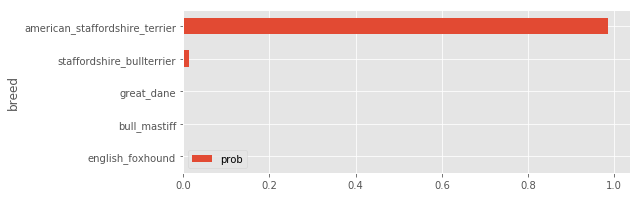

In [30]:
probs = classify('uri', image_uri)
probs.index = probs.breed
_ = probs.take(range(5)).sort_values(['prob']).plot.barh(figsize=(8, 3))